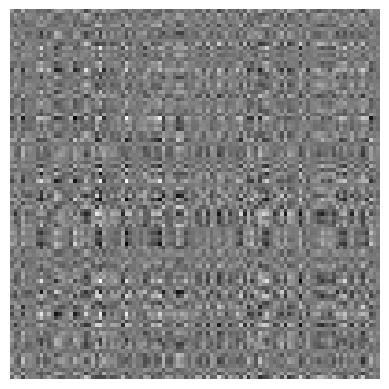

In [1]:
from utils.data_generation import create_rank_k_dataset
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

M, M_incomplete, omega, mask_array= create_rank_k_dataset(n_rows=100, n_cols=100, k=3, gaussian=True)
plt.axis('off')
plt.imshow(M, cmap='gray')

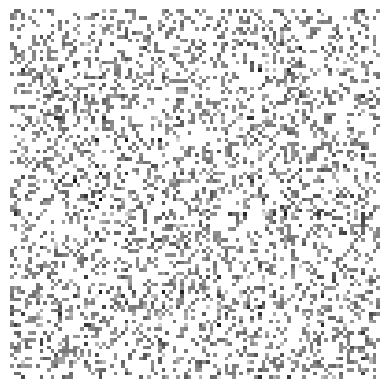

In [2]:
plt.axis('off')
plt.imshow(M_incomplete, cmap='gray')
missing_mask = ~mask_array.astype(bool)

In [3]:
%%time
from src.css_matrix_completion.transform import cx, ls
from src.css_matrix_completion.cssmc import CSSMC
from src.css_matrix_completion.css import uniform
from src.css_matrix_completion.mc.soft_impute import SoftImpute


#TODO svt
# proste przyrostowe
n_selected_cols = int(1 * M.shape[1])

solver = CSSMC(col_number=n_selected_cols, transform=cx, col_select=uniform, fill_method='zero', solver=SoftImpute)
M_filled, cols_idx = solver.fit_transform(M_incomplete)
print(f"rmse {np.linalg.norm(M_filled - M)/np.linalg.norm(M)}")
print(f"rmse_omega {np.linalg.norm(M_filled[missing_mask]- M[missing_mask])/np.linalg.norm(M[missing_mask])}")
print(f"mae_omega {np.mean(np.abs(M_filled[missing_mask]- M[missing_mask]))}")

2022-11-13 21:17:12.238520: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 21:17:12.407472: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-13 21:17:12.412308: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-13 21:17:12.412323: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

Updating for lambda 40.012953519160845


/home/tosia/NASK/css-matrix-completion/src/css_matrix_completion/errors/errors.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  return np.linalg.norm(X-Y)/np.linalg.norm(X)


Converged after 12 iterations and rankd 1 
Updating for lambda 29.000887905418075
Converged after 13 iterations and rankd 1 
Updating for lambda 28.291649591204195
Converged after 15 iterations and rankd 1 
Updating for lambda 27.5997562282204
Converged after 17 iterations and rankd 1 
Updating for lambda 26.9247836327655
Converged after 19 iterations and rankd 1 
Updating for lambda 26.266317994866576
Converged after 22 iterations and rankd 1 
Updating for lambda 25.6239556245819
Converged after 26 iterations and rankd 1 
Updating for lambda 24.997302704507863
Converged after 28 iterations and rankd 2 
Updating for lambda 24.385975048338864
Converged after 28 iterations and rankd 2 
Updating for lambda 23.7895978653315
Converged after 28 iterations and rankd 2 
Updating for lambda 23.20780553052917
Converged after 28 iterations and rankd 2 
Updating for lambda 22.640241360605916
Converged after 28 iterations and rankd 2 
Updating for lambda 22.086557395192166
Converged after 28 iterat

In [4]:
print(f"rmse {np.linalg.norm(M_filled - M)/np.linalg.norm(M)}")
print(f"rmse_omega {np.linalg.norm(M_filled[missing_mask]- M[missing_mask])/np.linalg.norm(M[missing_mask])}")
print(f"mae_omega {np.mean(np.abs(M_filled[missing_mask]- M[missing_mask]))}")

rmse 0.812220264979823
rmse_omega 0.9810138204723965
mae_omega 1.1819574787839384


In [9]:
print(f"rmse {np.linalg.norm(M_filled[:, cols_idx] - M[:, cols_idx])/np.linalg.norm(M[:, cols_idx])}")

rmse 0.041034228473124046


In [ ]:
from fancyimpute import NuclearNormMinimization
missing_mask = ~mask_array.astype(bool)
M_incomplete[missing_mask] = np.nan
solver = NuclearNormMinimization()
M_filled = solver.fit_transform(M_incomplete)
print(f"rmse {np.linalg.norm(M_filled - M)/np.linalg.norm(M)}")
print(f"rmse_omega {np.linalg.norm(M_filled[missing_mask]- M[missing_mask])/np.linalg.norm(M[missing_mask])}")
print(f"mae_omega {np.mean(np.abs(M_filled[missing_mask]- M[missing_mask]))}")

                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Nov 02 04:29:45 PM: Your problem has 10000 variables, 1 constraints, and 0 parameters.
(CVXPY) Nov 02 04:29:45 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 02 04:29:45 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 02 04:29:45 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 02 04:29:45 PM: Compiling problem (target solver=CVXOPT).
(CVXPY) Nov 02 04:29:45 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffi

In [7]:
M, M_incomplete, omega, mask_array= create_rank_k_dataset(n_rows=1000, n_cols=1000, k=5, gaussian=True)
cols = uniform(M, 500)
#ok_mask = np.array(~np.isnan(M))
ok_mask = mask_array
C = np.copy(M[:, cols])
ok_mask[:, cols] = True


In [8]:
%%time
X = cx(np.array(M), ok_mask.astype(bool), np.array(C))
np.linalg.norm(X-M)/np.linalg.norm(M)

/home/tosia/NASK/css-matrix-completion/src/css_matrix_completion/transform.py:84: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Y[i, :] = np.linalg.lstsq(siX, sia)[0]


CPU times: user 1min 45s, sys: 1min 55s, total: 3min 40s
Wall time: 29.3 s


9.747671333742385e-16

In [6]:
cols_idx

array([ 3,  7, 33, 50, 20, 27, 28, 38, 51,  2, 48, 55, 53, 69, 16, 42, 30,
       41, 67, 40, 45, 23, 66, 61, 59, 24,  9,  5, 64, 37, 22, 19, 47, 65,
        4])

In [9]:
n_selected_cols

1500

In [3]:
%%time
from fancyimpute import SoftImpute, SoftImputeWarmStarts
import fbpca

_, s, _ = fbpca.pca(
            M,
            1,
            n_iter=5)
max_sv = s[0]

for lambda_ in  np.exp(np.linspace(start=np.log(max_sv), stop=np.log(1), num=150)):
    solver = SoftImpute(shrinkage_value=lambda_, verbose=False)
    missing_mask = np.isnan(M_incomplete)
    M_incomplete[missing_mask] = 0
    M_filled = solver.fit_transform(M_incomplete, missing_mask)
    print(f"lambda {lambda_} error {np.linalg.norm(M_filled - M) / np.linalg.norm(M)}")

# missing_mask = np.isnan(M_incomplete)
# sv = np.linalg.norm(M_incomplete)/
# solver = SoftImpute(convergence_threshold=0.0000001)
# M_incomplete[missing_mask] = 0
# M_filled = solver.fit_transform(M_incomplete)
#

2022-11-13 21:28:36.705763: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 21:28:36.896721: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-13 21:28:36.902237: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-13 21:28:36.902254: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

lambda 114.01074370548537 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 110.44365569971386 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 106.98817223600014 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 103.64080150988417 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 100.3981609660292 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 97.25697388011241 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 94.21406604765794 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 91.26636257646834 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 88.41088477941182 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 85.64474716442568 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 82.96515451869455 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 80.3693990840567 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 77.85485782078436 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 75.41898975697306 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 73.05933342086095 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 70.77350435348443 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 68.55919269915577 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 66.41416087132839 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 64.33624129149061 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 62.32333419880356 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 60.373405528269394 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 58.4844848552863 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 56.654663404512085 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 54.88209212102581 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 53.16497980183708 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 51.501591285855525 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 49.890245700491334 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 48.32931476311465 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 46.817221135657945 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 45.352436830698416 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 43.933481667409616 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 42.55892177582231 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 41.227368147882956 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 39.93747523384553 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 38.68793958257872 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 37.47749852441385 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 36.30492889520334 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 35.16904580029957 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 34.068701417205766 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 33.00278383568859 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 31.970215934180462 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 30.969954291336226 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 30.00098813164436 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 29.062338304026976 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 28.153056292396865 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 27.272223257171365 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 26.4189491067748 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 25.592371598191015 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 24.79165546565724 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 24.015991576618767 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 23.26459611409144 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 22.53670978460597 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 21.831597050933365 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 21.14854538881642 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 20.486864566956015 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 19.845885949524735 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 19.224961820502898 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 18.623464729154378 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 18.04078685598057 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 17.47633939851212 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 16.929551976317402 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 16.399872054626815 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 15.886764385990215 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 15.389710469403422 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 14.908208026357222 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 14.441770493279304 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 13.989926529856376 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 13.55221954273956 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 13.128207224151705 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 12.717461104930475 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 12.319566121555491 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 11.934120196722045 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 11.560733833037492 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 11.199029719429811 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 10.848642349870575 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 10.509217654027053 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 10.180412639470179 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 9.861895045076908 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 9.553343005276652 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 9.254444724802546 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 8.964898163618855 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 8.684410731706157 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 8.412698993395901 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 8.149488380955482 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 7.894512917134506 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 7.647514946391821 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 7.408244874531741 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 7.176460916486311 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 6.951928851988826 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 6.734421788891635 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 6.523719933889124 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 6.319610370414109 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 6.121886843483297 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 5.930349551274324 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 5.744804943223799 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 5.565065524442298 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 5.390949666248701 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 5.222281422632389 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 5.058890352457841 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 4.9006113472319734 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 4.74728446426017 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 4.59875476502242 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 4.454872158606208 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 4.315491250037982 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 4.18047119335992 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 4.049675549303526 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 3.9229721474162202 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 3.800232952501637 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 3.681333935238633 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 3.566154946848282 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 3.454579597682191 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 3.3464951396094715 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 3.241792352083497 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 3.1403654317733323 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 3.042111885648283 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 2.9469324274075506 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 2.8547308771503284 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 2.7654140641849323 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 2.6788917328787876 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 2.5950764514541063 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 2.513883523637105 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 2.435230903071478 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 2.359039110409639 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 2.2852311529979605 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 2.213732447074843 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


lambda 2.144470742402988 error 0.8356993209240741


/home/tosia/fancyimpute/fancyimpute/solver.py:59: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


KeyboardInterrupt: 